### NOTE
I've used dark background for all matplotlib images, comment the following line in the following block to view default
``` python
plt.style.use('dark_background')
```

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# changing theme
plt.style.use('dark_background')
# clear image
%config InlineBackend.figure_format = 'retina'  

# Question 1

### Question 1-a

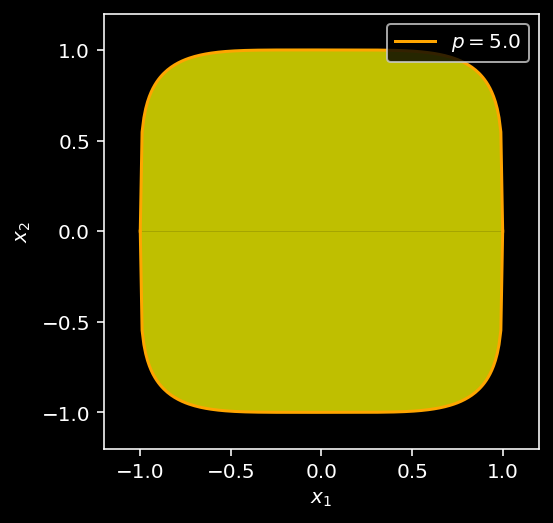

In [2]:
# Prompt user to enter a number, deafults at 0
str = input("Please enter p:")
try :
    p = float(str if str else 1)
except:
    raise ValueError("Enter a float")

def unit_ball(p, fill=False):
    assert p>=0, "probability shouldn't be less than 0"
    x = np.linspace(-1,1,201)
    y_pos = (1-np.abs(x)**p)**(1/p)
    y = np.vstack((y_pos,-y_pos)).T
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,y, color='orange')
    fig.gca().set_aspect('equal')
    ax.legend(['$p={}$'.format(p)],loc='upper right')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.margins(0.1)
    if fill:
        # ax.fill(x,y_pos,'y')
        ax.fill(x,y,'y')
    return fig,ax
unit_ball(p, fill=True)
plt.show()

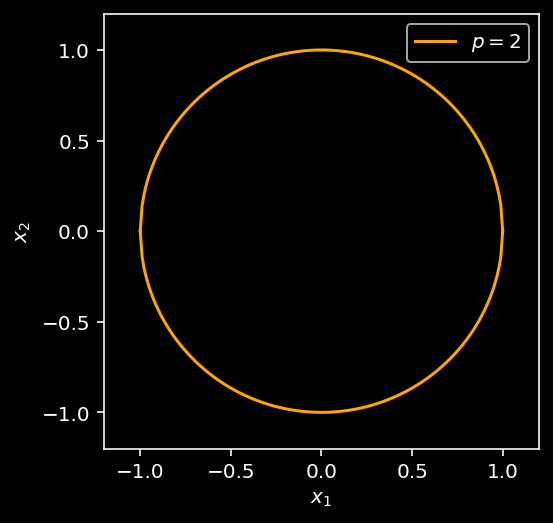

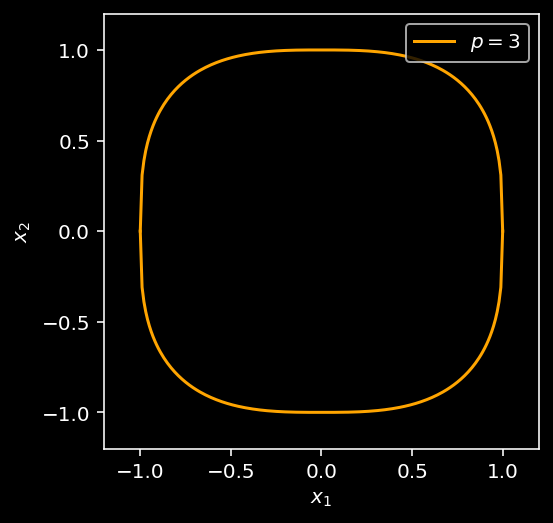

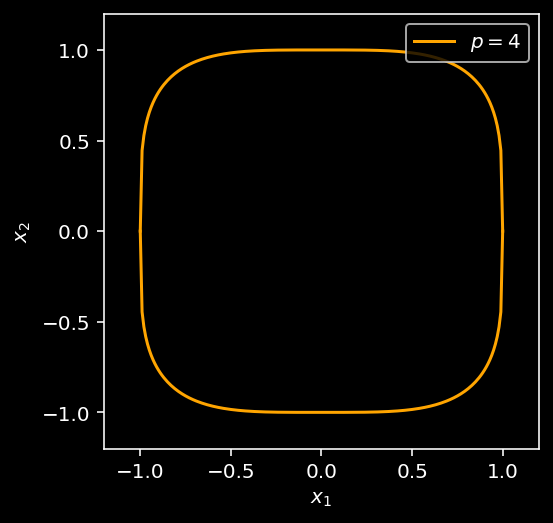

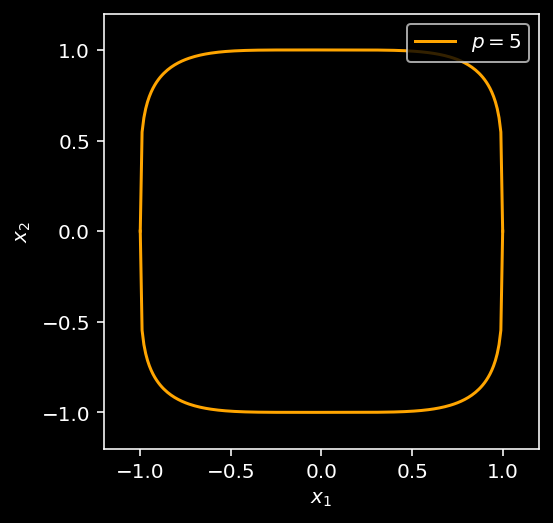

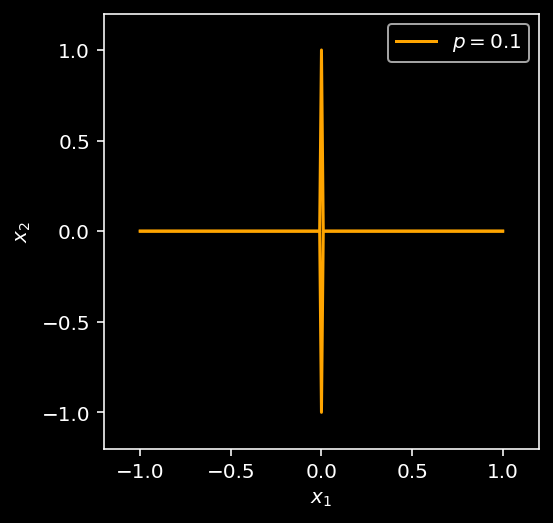

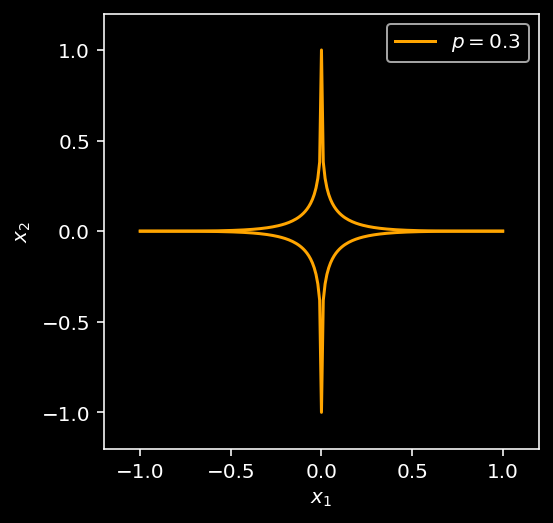

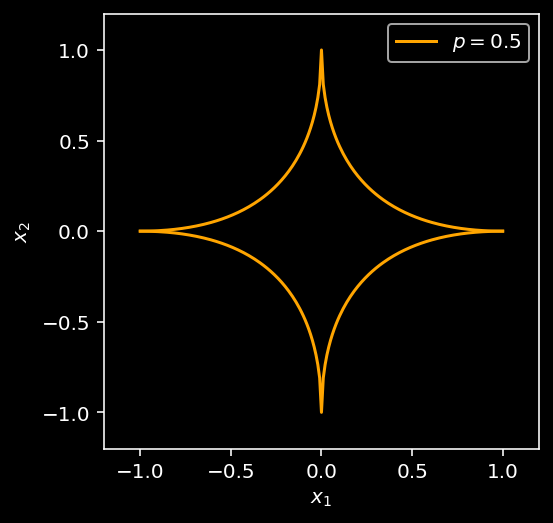

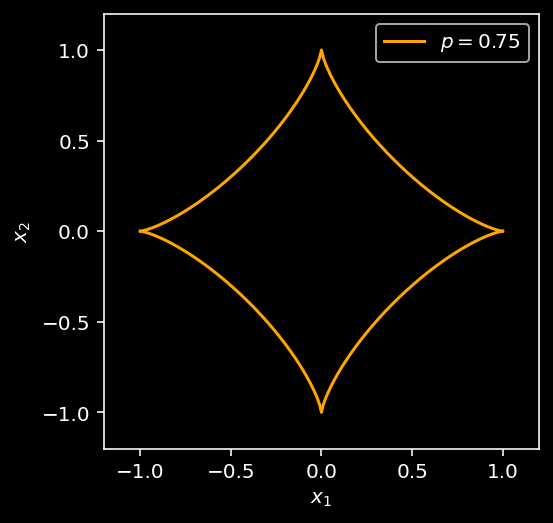

In [3]:
p = [2,3,4,5,0.1,0.3,0.5,0.75]
for i in p:
    unit_ball(i)


### Question 1-b

### Convexity for $p\geq 1$

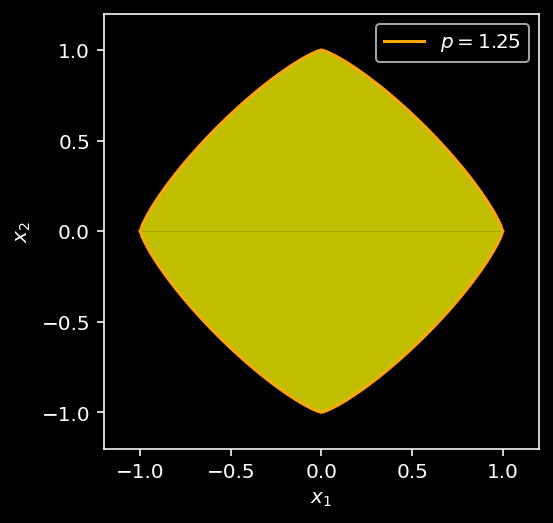

In [4]:
unit_ball(1.25, fill=True)
plt.show()

It seems clear that the unit ball with $p\geq 1$ is convex, any line segment that can be drawn between

### Non convexity for &nbsp; $0<p<1$

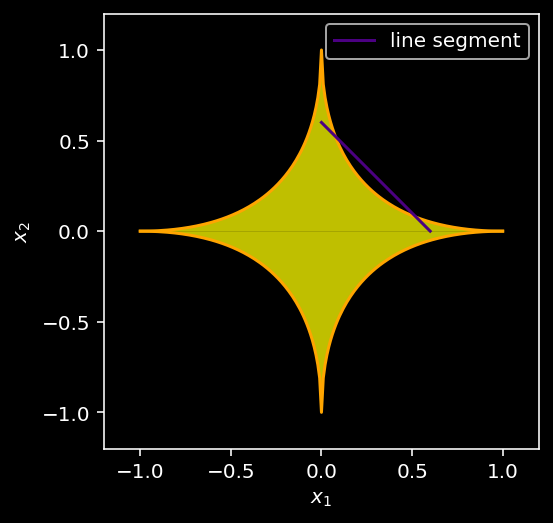

In [5]:
fig, ax = unit_ball(0.5,fill=True)
ax.plot([0.6,0],[0,0.6],color='indigo',label='line segment')
ax.legend()
plt.show()

It can be clearly seen that the set is not convex, we can see a line exists which has end points in the unit ball but some points on the line lie outside the ball

# Question-2

$f_n(x)=x^n$, &nbsp; $x\in C[0,1]$      

$f(x) = \begin{cases} 1 & x=1\\ 0 & otherwise \end{cases} $         

$d(f,f_n) = \displaystyle \int_{0}^{1} x^n dx = \frac{1}{n+1} $     

$ \frac{1}{n+1}< \epsilon ,\, \forall n > \frac{1}{\epsilon},\, n \in \mathbb{N}$           

$f(x)$ is not a continuous function. 

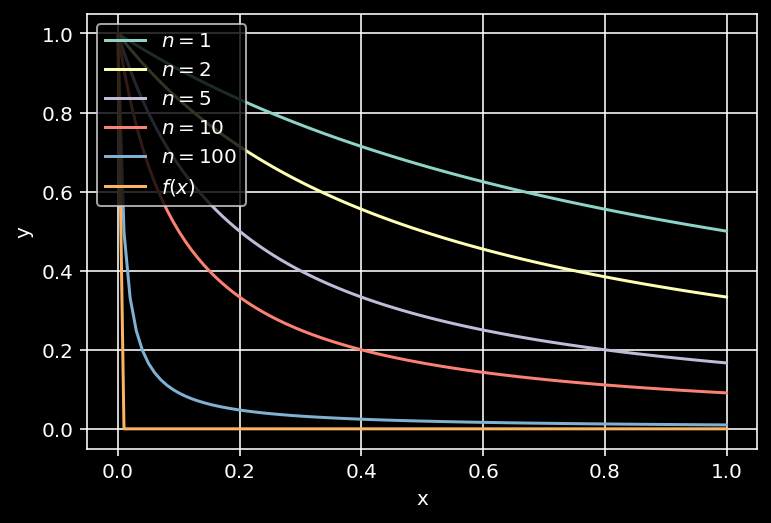

In [3]:
def f_n(x,n):
    return np.power(x,n)
def f(x):
    return np.where(x==1, 1, 0)

x = np.linspace(0,1,100)

plt.plot(x, f_n(x,1), label='$n=1$')
plt.plot(x, f_n(x,2), label='$n=2$')
plt.plot(x, f_n(x,5), label='$n=5$')
plt.plot(x, f_n(x,10), label='$n=10$')
plt.plot(x, f_n(x,100), label='$n=100$')
plt.plot(x, f(x), label='$f(x)$')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()



It can be seen above that $f_n(x) \rarr f(x)$, but $f(x)$ is not in the given function space, as it is not continuous

Now, to prove that the sequence of functions is cauchy      
\begin{align}
d(f_m(x)-f_n(x)) = \displaystyle \int_{0}^{1}\mid{x^m-x^n}\mid dx = \mid \frac{1}{m+1}-\frac{1}{n+1} \mid
\end{align}
Choose, $N>\frac{1}{\epsilon}$          
$\forall\ \epsilon\ \exists\ N \in \mathbb{N}\ :$
\begin{align}
\mid \frac{1}{m+1} - \frac{1}{n+1} \mid < \epsilon\ \forall\ m,n\ \geq\ N
\end{align}     
The sequence is cauchy, we proved earlier that it converges to $f$ which is not in the given space **or it can be said that the sequence doesn't converge in the given space**. Therefore, the space of continuous functions defined on $C[0,1]$ with respect to metric induced by $L_1$ norm

# Question-3


In [7]:
def E_p(px):
    return -np.sum((np.log2(px)*px),axis=0)

def H(pmf): # pmf is a dictionary
    p = np.array(list(pmf.values()))
    assert (p>=0).all(), "Probability should be non-negative"
    p = p/np.sum(p, axis=0)     # to normalise probability, incase the probabilities don't sum to 1
    p[p==0]=1                   # replacing p(x) by 1 makes log(p(x)) = 0 , thus making contribution 0
    entropy = E_p(p)  
    return entropy

pmf1 = {'rain':0.05,'sunny':0.8,'cloudy':0.15}
pmf2 = {'rain':1,'sunny':0.0,'cloudy':0}


print('for pmf1:',H(pmf1))
print('for pmf2:',H(pmf2))

for pmf1: 0.8841837197791889
for pmf2: -0.0


Maxima is achieved at p=0.5


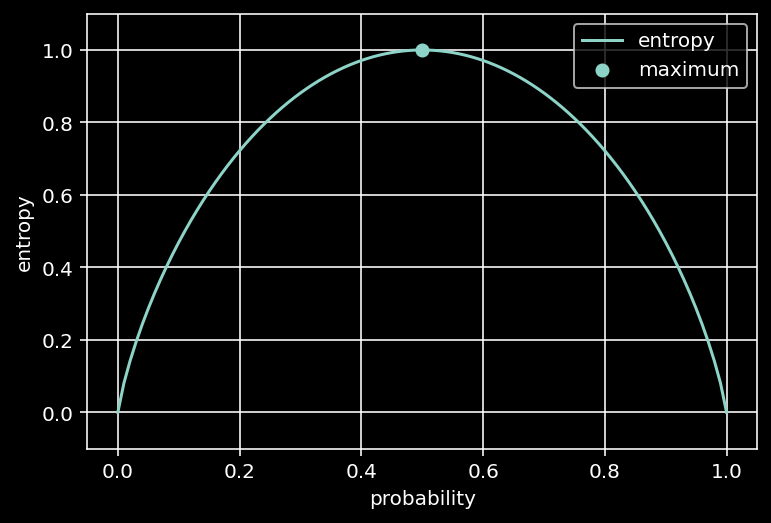

In [8]:
p = np.linspace(0,1,101)
bern = {0:p,1:1-p}
entropies = H(bern)
index = np.argmax(entropies)
print("Maxima is achieved at p={}".format(p[index]))
plt.plot(p,entropies,label='entropy')
plt.scatter(p[index],entropies[index],marker='o',label='maximum')
plt.xlabel('probability')
plt.ylabel('entropy')
plt.legend()
plt.grid()
plt.margins(y=0.1)
plt.show()

# Question-4


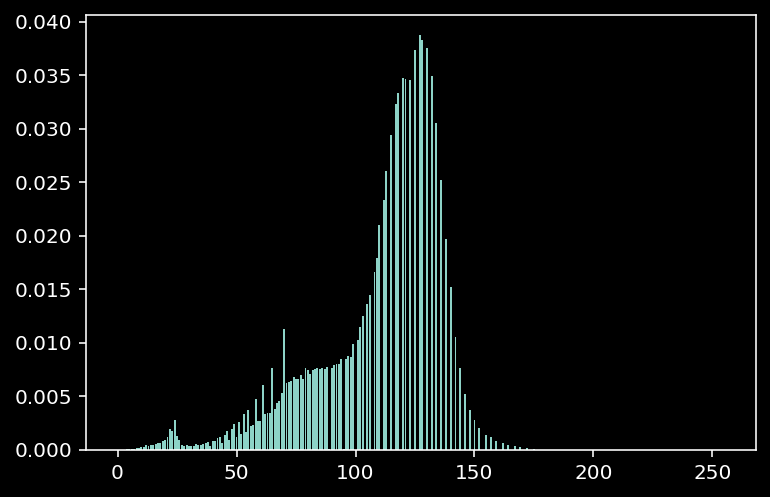

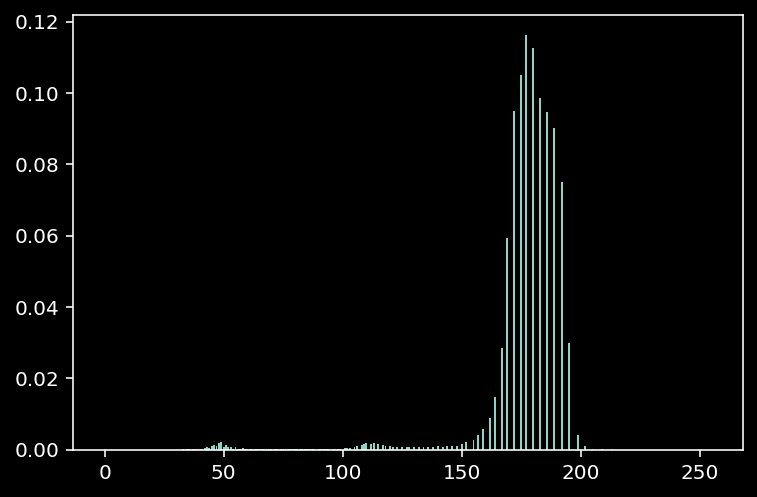

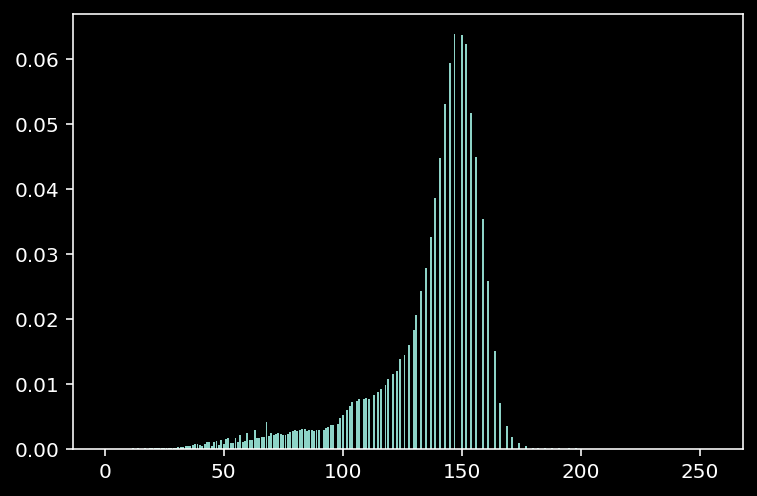

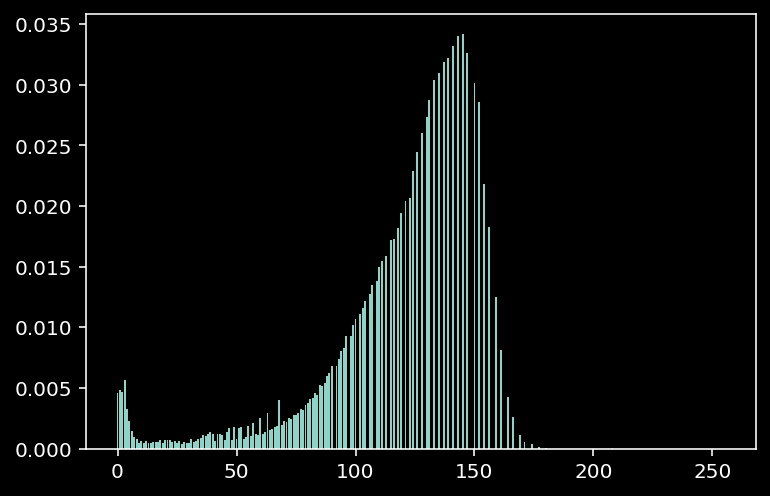

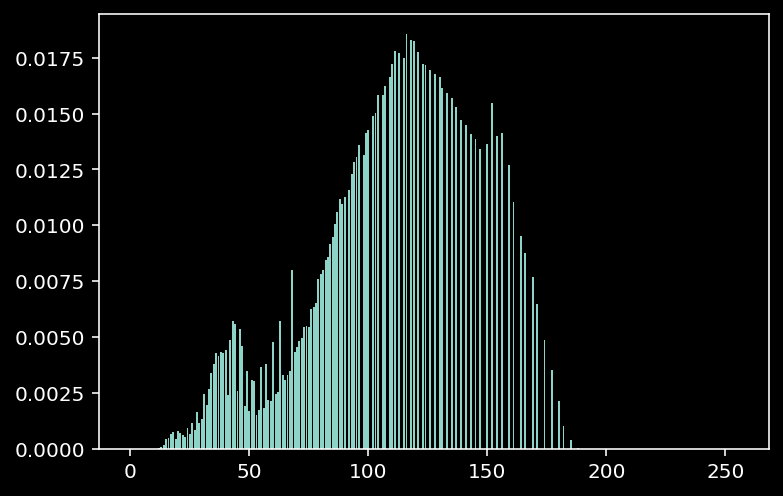

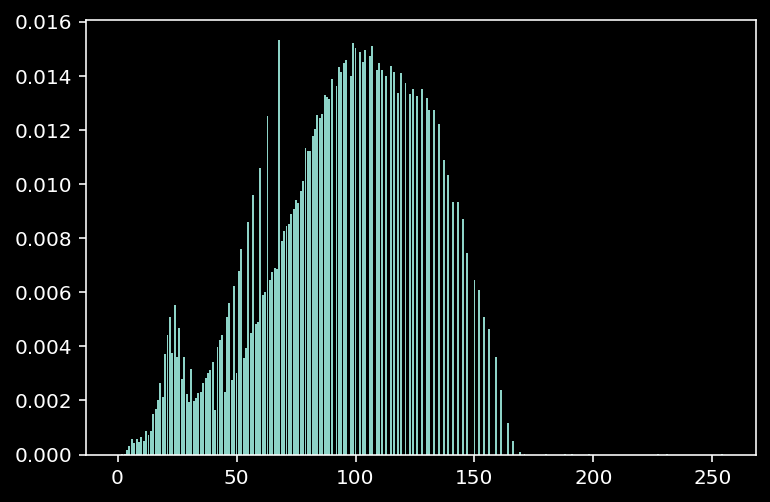

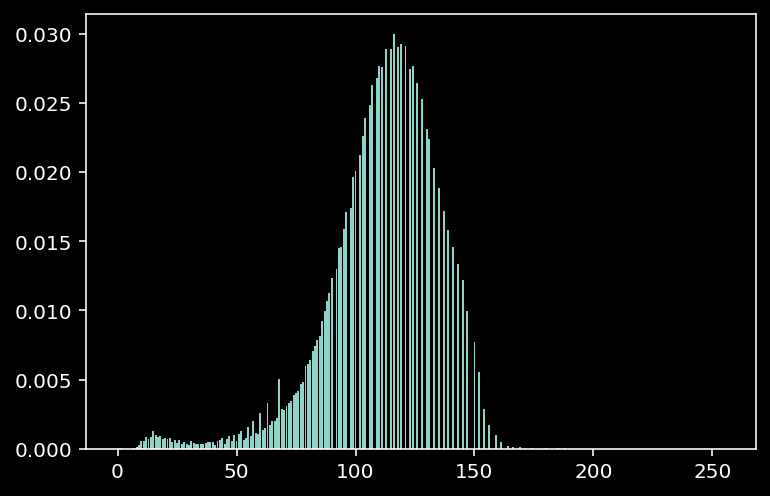

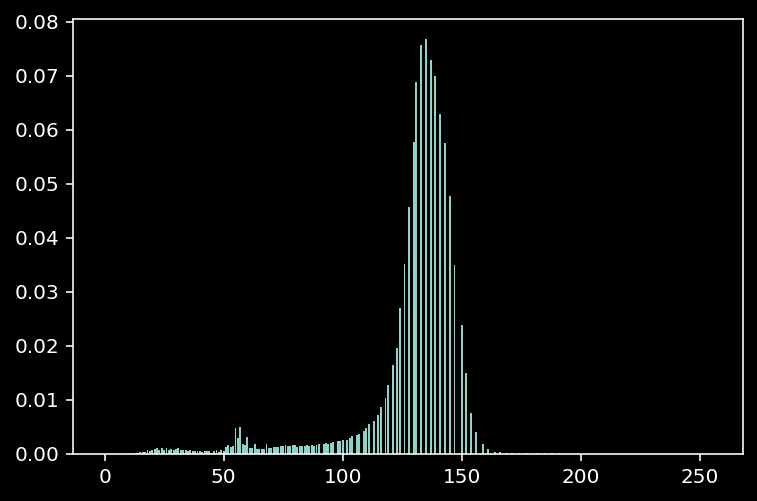

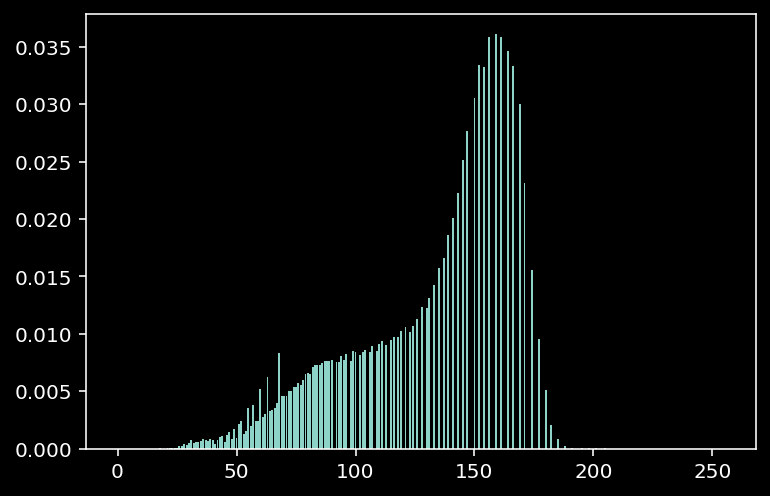

In [9]:
def normal_hist(img, plot=True):
    arr = np.zeros(256)
    img = img.flatten()
    np.add.at(arr,img,1)  # could be done with generator object, but add.at seems fancier, efficient
    arr = arr/img.shape[0]
    if plot:
        f = plt.figure()
        ax = f.add_subplot(1,1,1)
        ax.bar(np.arange(256),arr)
    return arr, (f,ax) if 'f' in locals() else (None,None)

imgs = ['misc/7.1.0{}.tiff'.format(i) for i in range(1,10)]
images = [mpimg.imread(img) for img in imgs]
# count,(fig,ax)
x = [normal_hist(img) for img in images]
count = np.array([arr[0] for arr in x])
plt.show()

In [10]:
pmf = dict(zip(np.arange(256),count.T))
Hs = dict(zip(imgs,H(pmf)))
print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in Hs.items()) + "}")

{'misc/7.1.01.tiff': 6.027414821000316,
'misc/7.1.02.tiff': 4.004499444666612,
'misc/7.1.03.tiff': 5.495739988888563,
'misc/7.1.04.tiff': 6.107418111172204,
'misc/7.1.05.tiff': 6.563195555927603,
'misc/7.1.06.tiff': 6.695283380711027,
'misc/7.1.07.tiff': 5.9915987632845376,
'misc/7.1.08.tiff': 5.053447996731094,
'misc/7.1.09.tiff': 6.189813703500486,}


### Question 4-b
If the spread of the curve is more (height would be less) then the entropy is higher, this is because the probability is distributed more equally, as the pmf becomes more equitable, the entropy rises. Thus the entropy is higher in the cases where the max height of the curve is lower ( the spread is higher )


# Question-5


### Question 5-b

In [11]:
# Joint Entropy
jointH = lambda Jpmf: H(dict(zip (np.arange(Jpmf.flatten().shape[0]), Jpmf.flatten() )))
# This accepts a numpy array (2D)

### Question 5-a,c

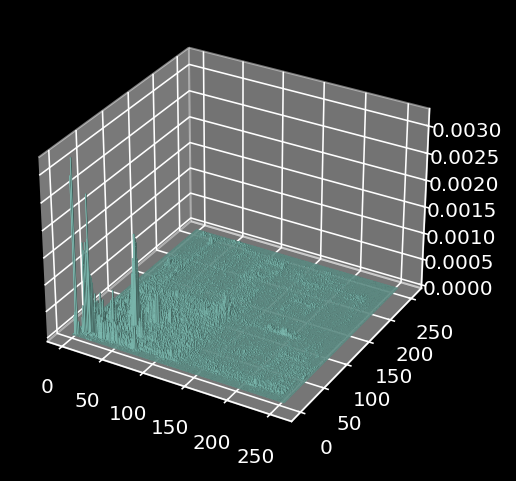

Entropy:13.67520326338231


In [12]:
def normal_JH(img1,img2, *args, **kwargs):
    plot = kwargs.get('plot',True)
    entropy = kwargs.get('H',True)
    arr = np.zeros((256,256))
    np.add.at(arr,(img1,img2),1)
    arr = arr/img1.shape[0]
    if plot:
        fig = plt.figure()
        _x = np.arange(256)
        _y = np.arange(256)
        _xx, _yy = np.meshgrid(_x, _y)
        x, y = _xx.ravel(), _yy.ravel()
        top = arr.flatten()
        width = depth =1
        axJH = fig.add_subplot(111, projection='3d')
        axJH.bar3d(x,y, np.zeros_like(top),width, depth, top, shade=True)
    if entropy:
        H_joint = jointH(arr)
    return arr, ax if 'axJH' in locals() else None, H_joint if 'H_joint' in locals() else None
    
left = (mpimg.imread('left.png').flatten()*255).astype(int)
right = (mpimg.imread('right.png').flatten()*255).astype(int)

hist, ax, entropy = normal_JH(left, right)
plt.show()
print("Entropy:{}".format(entropy))


# Question-6


### Question-6 a

In [13]:
def condP(pmf, idx, val):
    if idx == 0:
        pmf = pmf.T
    
    pxyy = pmf[:,val]
    s = np.sum(pxyy, axis = 0)
    # print(s)
    s[s==0]=1e-15
    pxyy/=s
    return pxyy

# testing
pmf = np.array([[1/8,1/16,1/16,1/4],[1/16,1/8,1/16,0],[1/32,1/32,1/16,0],[1/32,1/32,1/16,0]])
print(condP(pmf,1,np.array([0,1,2,3])))
    

[[0.5   0.25  0.25  1.   ]
 [0.25  0.5   0.25  0.   ]
 [0.125 0.125 0.25  0.   ]
 [0.125 0.125 0.25  0.   ]]


### Question-6 b

In [14]:
def condE(pmf, idx):
        
    s = pmf.shape[idx]
    val = np.arange(s)
    pxyy = condP(pmf,idx,val)
    pxyy[pxyy==0]=1
    pxgy = np.log2(pxyy)
    if idx == 0:
        pmf = pmf.T
    return -(np.sum(pmf*pxgy))
# testing
condE(pmf,0)

1.625

### Question 6-c

In [15]:
print("Entropy of joint histogram in q5a:",condE(hist,0))

Entropy of joint histogram in q5a: 6.416909158632369


# Question 7


### 7-a

In [16]:
def dpq(p,q):
    idx = np.argwhere(q==0.0)
    q[idx]+=1e-5
    idx = np.argwhere(p==0.0)
    p[idx]+=1e-5
    return np.sum( (p*np.log2(p/q)).T , axis = 0 )

# testing
p = np.array([0.5,0.5])
# q = np.array([[0.5,0.8,0.3],[0.5,0.2,0.7]]).T
q = np.array([0.0,1.0])
dpq(q,p)

0.9998439035952557

### 7-b

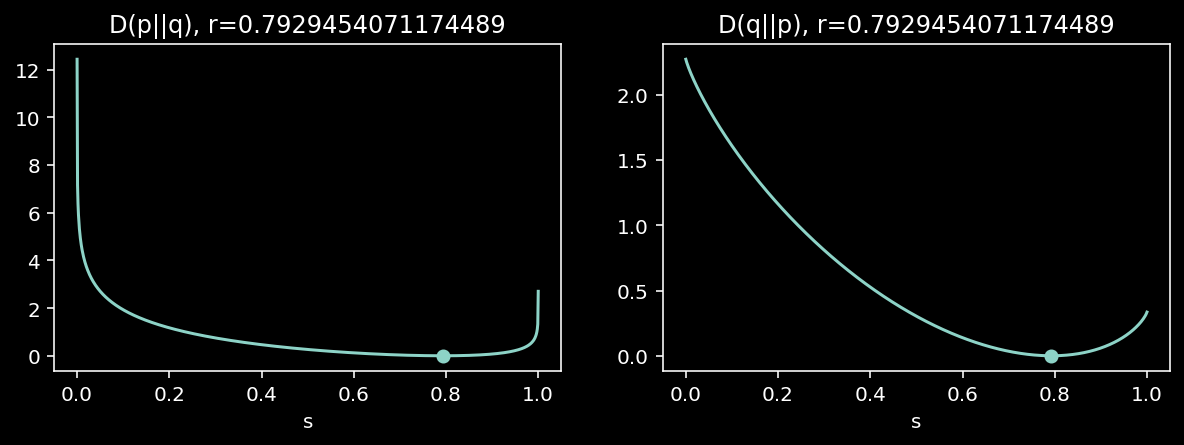

In [17]:
r = np.random.rand()
p = np.array([r,1-r])
s = np.linspace(0,1,1000)
q = np.array([s,1-s]).T

dist1 = dpq(p,q)
dist2 = dpq(q,p)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
ax1.plot(s,dist1)
ax1.set_title("D(p||q), r={}".format(r))
ax1.set_xlabel('s')
ax1.scatter(r,0)

ax2.plot(s,dist2)
ax2.set_title("D(q||p), r={}".format(r))
ax2.set_xlabel('s')
ax2.scatter(r,0)


plt.show()



### ii
It is clear from the plot that D(p||q) and D(q||p) are both non-negative, to calculate the kl divergence, wherever the probability in q comes to be 0, it has been set to a very small value, as it would tend to infinity. For kl divergence we should have a data where 

$ q_i=0 \implies p_i=0$

but since this may not hold, the value has been set to a very small constant

### iii
The point where $r=s$ has been marked in the above plot, it can be seen that, $D(p||q)=D(q||p)=0$

In [18]:
pmf1 = normal_hist(left, plot=False)[0]
pmf2 = normal_hist(right, plot=False)[0]

dlr = dpq(pmf1,pmf2)
drl = dpq(pmf2,pmf1)
print("D(left||right):",dlr, "\nD(right||left):",drl)

D(left||right): 0.015104015237387055 
D(right||left): 0.014409785833354484


In [19]:
# import wget
# url ="https://github.com/cmaspi/algorithms/raw/main/temp/Left_resized.png"
# wget.download(url)
# leftR = (mpimg.imread("Left_resized.png").flatten()*255).astype(int)
# pmfC = normal_hist(leftR, plot=False)[0]
# dcl = dpq(pmf1,pmfC)
# print(dcl)

### iv
### Do you think D(p||q) is a good metric for image similarity?
I think D(p||q) is a good metric for image similarity, but this should be taken with a grain of salt. The distributions p,q will be similar if a major chunk of the image is the same, since it focuses only on the probability distribution of each pixel value the spatial location doesn't matter, if the different part of the images also follow a similar distribution as the same part, the divergence would be close to 0. This should even work when the image has been compressed, uncomment the above cell to see the divergence between original left.png and a resized image. 
However, what if the image is a shade of gray?, and another image just differs by 1 intensity level. what would comparison mean then? the divergence would be very high. Particularly, this kind of adversary would affect images that have a low spread in pmf values, or lower entropy.